In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# Zadanie 1

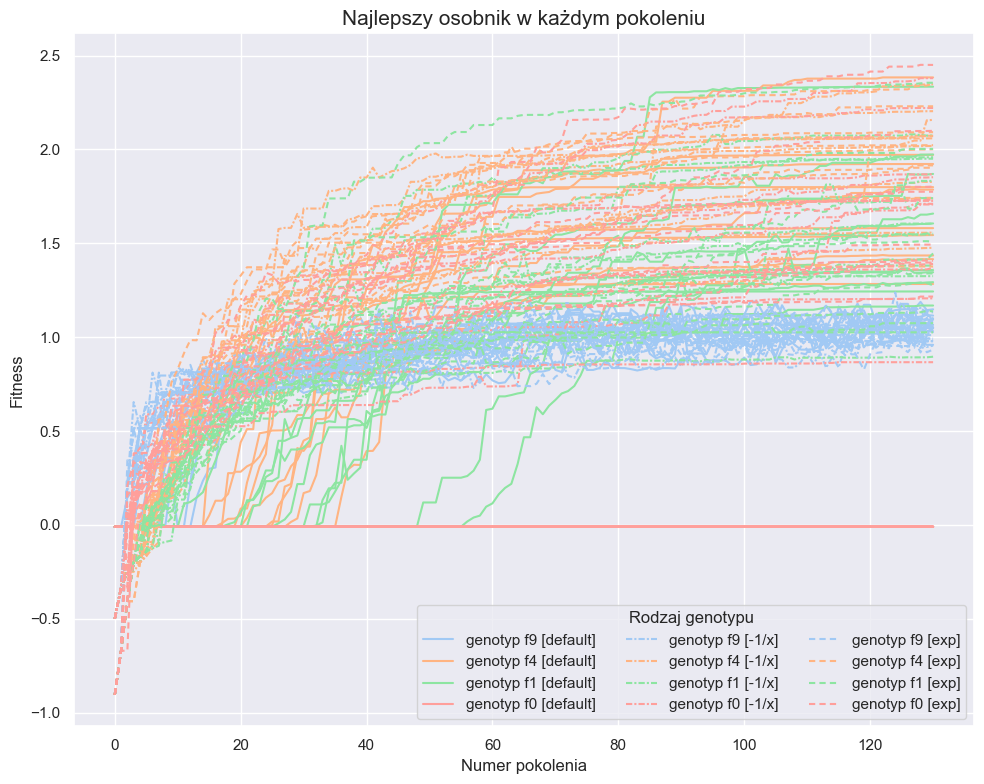

In [71]:
G_VALUES = ["9", "4", "1", "0"]
palette = sns.color_palette("pastel", len(G_VALUES))
color_map = dict(zip(G_VALUES, palette)) 
plt.figure(figsize=(10, 8))

for g_value in G_VALUES:
    for i in range(1, 11):
        df = pd.read_csv(f"../framspy/lab2/default/f{g_value}/Deap/{i}.csv", usecols=['gen', 'max'])
        sns.lineplot(df, x='gen', y='max', color=color_map[g_value], label=f"genotyp f{g_value} [default]" if i == 1 else "")

for g_value in G_VALUES:
    for i in range(1, 11):
        df = pd.read_csv(f"../framspy/lab2/reciprocal/f{g_value}/Deap/{i}.csv", usecols=['gen', 'max'])
        sns.lineplot(df, x='gen', y='max', color=color_map[g_value], linestyle=(0,(3, 1, 1, 1)), label=f"genotyp f{g_value} [-1/x]" if i == 1 else "")

for g_value in G_VALUES:
    for i in range(1, 11):
        df = pd.read_csv(f"../framspy/lab2/exp/f{g_value}/Deap/{i}.csv", usecols=['gen', 'max'])
        sns.lineplot(df, x='gen', y='max', color=color_map[g_value], linestyle=(0,(3, 2)), label=f"genotyp f{g_value} [exp]" if i == 1 else "")

plt.title("Najlepszy osobnik w każdym pokoleniu", fontsize=15)
plt.ylabel("Fitness")
plt.xlabel("Numer pokolenia")

plt.legend(title="Rodzaj genotypu", ncol=3)
plt.tight_layout()
plt.savefig('zadanie2-1.png')
plt.show()

# Zadanie 2

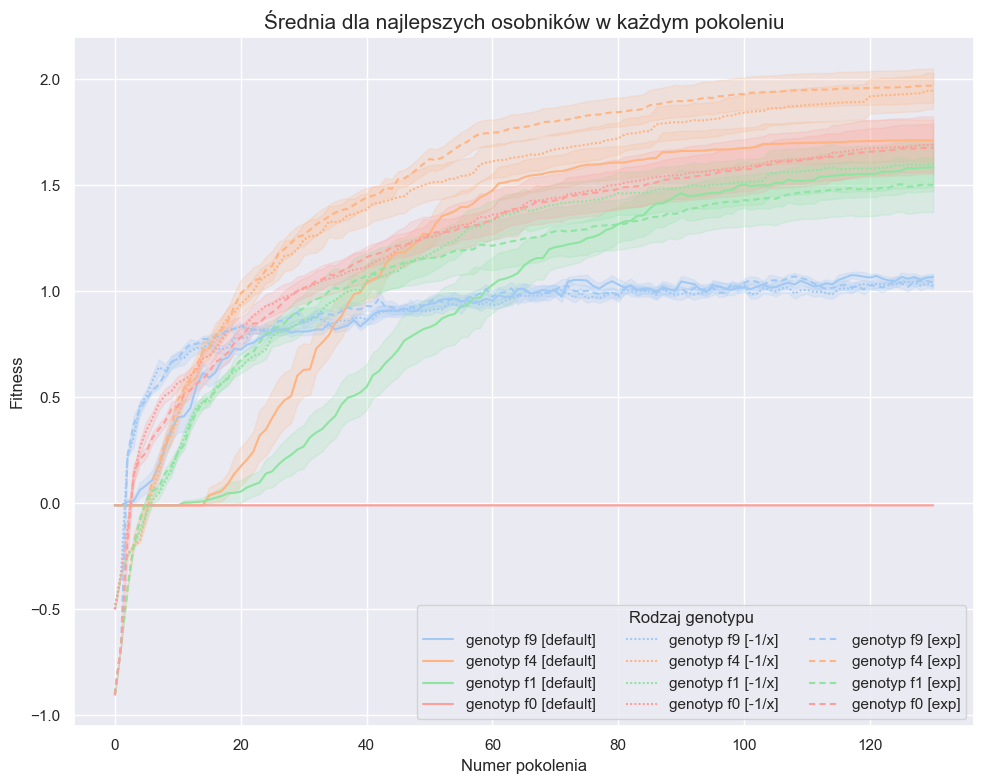

In [72]:
G_VALUES = ["9", "4", "1", "0"]
palette = sns.color_palette("pastel", len(G_VALUES))
color_map = dict(zip(G_VALUES, palette)) 
plt.figure(figsize=(10, 8))

for g_value in G_VALUES:
    df = pd.DataFrame()
    for i in range(1, 11):
        df_temp = pd.read_csv(f"../framspy/lab2/default/f{g_value}/Deap/{i}.csv", usecols=['gen', 'max'])
        df = pd.concat([df, df_temp])
    sns.lineplot(df, x='gen', y='max', color=color_map[g_value], label=f"genotyp f{g_value} [default]", errorbar=("sd", 0.3))

for g_value in G_VALUES:
    df = pd.DataFrame()
    for i in range(1, 11):
        df_temp = pd.read_csv(f"../framspy/lab2/reciprocal/f{g_value}/Deap/{i}.csv", usecols=['gen', 'max'])
        df = pd.concat([df, df_temp])
    sns.lineplot(df, x='gen', y='max', color=color_map[g_value], linestyle=(0,(1, 1, 1, 1)), label=f"genotyp f{g_value} [-1/x]", errorbar=("sd", 0.3))   

for g_value in G_VALUES:
    df = pd.DataFrame()
    for i in range(1, 11):
        df_temp = pd.read_csv(f"../framspy/lab2/exp/f{g_value}/Deap/{i}.csv", usecols=['gen', 'max'])
        df = pd.concat([df, df_temp])
    sns.lineplot(df, x='gen', y='max', color=color_map[g_value], linestyle=(0,(3, 2)), label=f"genotyp f{g_value} [exp]", errorbar=("sd", 0.3)) 

plt.title("Średnia dla najlepszych osobników w każdym pokoleniu", fontsize=15)
plt.ylabel("Fitness")
plt.xlabel("Numer pokolenia")

plt.legend(title="Rodzaj genotypu", ncol=3)
plt.tight_layout()
plt.savefig('zadanie2-2.png')
plt.show()

# Zadanie 3

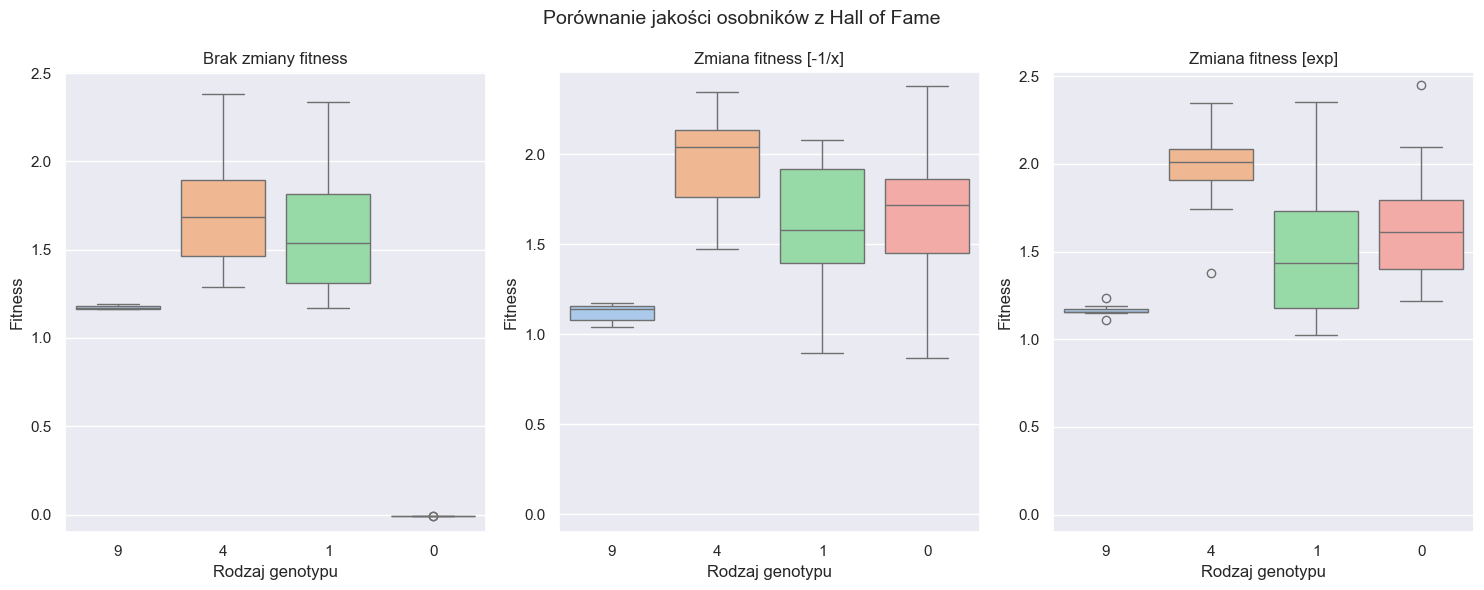

In [67]:
G_VALUES = ["9", "4", "1", "0"]
palette = sns.color_palette("pastel", len(G_VALUES))
color_map = dict(zip(G_VALUES, palette))
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
axes = axes.flatten()

types = [(i, t) for i, t in enumerate([('default', "Brak zmiany fitness"), ('reciprocal', "Zmiana fitness [-1/x]"), ('exp', "Zmiana fitness [exp]")])]

for x, (t, title) in types:
    data = {g_value: [] for g_value in G_VALUES}
    for g_value in G_VALUES:
        for i in range(1, 11):
            with open(f"../framspy/lab2/{t}/f{g_value}/HoF/{i}.gen") as file:
                for line in file:
                    if line.startswith("vertpos"):
                        value = float(line.split(':')[1])
                        data[g_value].append(value)
        
    
    df = pd.DataFrame(data)
    sns.boxplot(df, palette='pastel', ax=axes[x])
    axes[x].set_title(title)
    axes[x].set_ylim(-.1, None)


plt.suptitle("Porównanie jakości osobników z Hall of Fame", fontsize=14)
for ax in axes:
    ax.set_xlabel("Rodzaj genotypu")
    ax.set_ylabel("Fitness")
plt.tight_layout()
plt.savefig('zadanie3-3a.png')
plt.show()

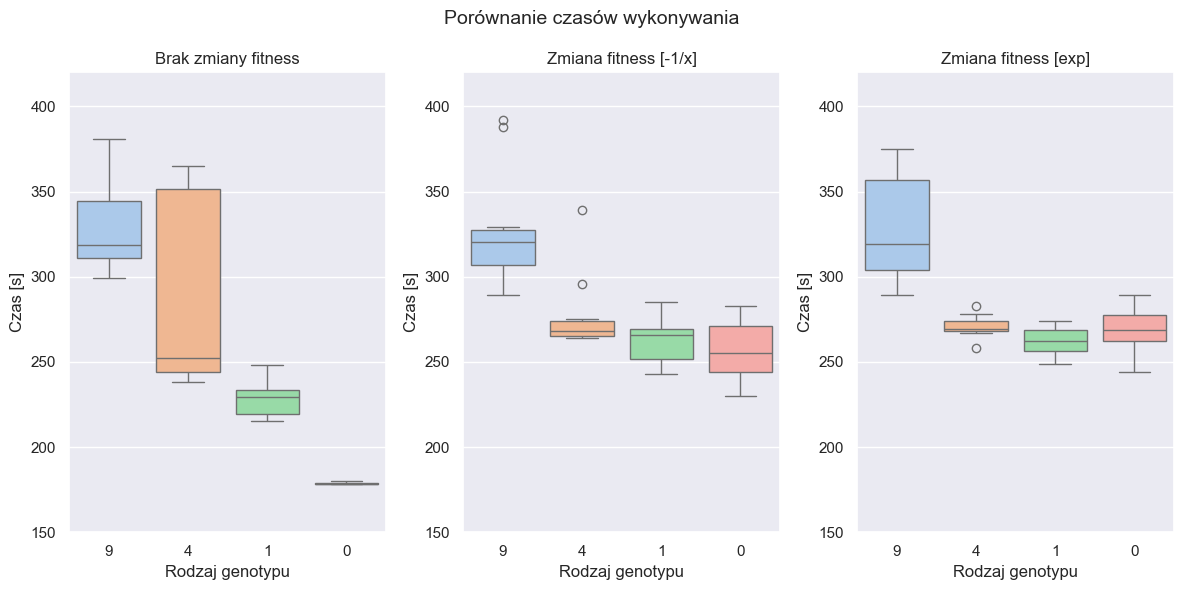

In [70]:
G_VALUES = ["9", "4", "1", "0"]
palette = sns.color_palette("pastel", len(G_VALUES))
color_map = dict(zip(G_VALUES, palette))
fig, axes = plt.subplots(1, 3, figsize=(12, 6))
axes = axes.flatten()

types = [(i, t) for i, t in enumerate([('default', "Brak zmiany fitness"), ('reciprocal', "Zmiana fitness [-1/x]"), ('exp', "Zmiana fitness [exp]")])]

for x, (t, title) in types:
    data = {g_value: [] for g_value in G_VALUES}
    for g_value in G_VALUES:
        df = pd.read_csv(f"../framspy/lab2/{t}/f{g_value}/times.txt")
        data[g_value] = df['time'].to_list()
    
    df = pd.DataFrame(data)
    sns.boxplot(df, palette='pastel', ax=axes[x])
    axes[x].set_title(title)
    axes[x].set_ylim(150, 420)

plt.suptitle("Porównanie czasów wykonywania", fontsize=14)
for ax in axes:
    ax.set_xlabel("Rodzaj genotypu")
    ax.set_ylabel("Czas [s]")
plt.tight_layout()
plt.savefig('zadanie3-3b.png')
plt.show()